### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : stratis_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [7]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/stratis_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,5.79,6.23,5.11,6.03,"8,514,110","570,643,000"
1,2017-09-04,6.61,6.74,5.35,5.77,"14,669,700","651,334,000"
2,2017-09-03,6.36,6.59,5.99,6.59,"8,487,740","626,826,000"
3,2017-09-02,7.27,7.27,6.18,6.34,"11,500,400","716,038,000"
4,2017-09-01,7.28,7.78,6.97,7.25,"22,610,800","717,199,000"


In [8]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1494 entries, 2017-09-05 to 2013-08-04
Data columns (total 6 columns):
Open          1494 non-null float64
High          1494 non-null float64
Low           1494 non-null float64
Close         1494 non-null float64
Volume        1494 non-null object
Market Cap    1494 non-null object
dtypes: float64(4), object(2)
memory usage: 81.7+ KB


- The data frame has 1494 entries and 6 columns. 
- All columns has 1494 elements, probably there's no missing data. To make it sure, We'll see for this
- Volume and market cap's data type are an object, it should be number.

In [10]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    1
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume recognize as a string, not a number.
- There is null data in Market Cap

Solution:
- Convert to float number
- Using interpolation to fill the missing data

In [11]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [12]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 2017-09-05 to 2016-08-12
Data columns (total 6 columns):
Open          390 non-null float64
High          390 non-null float64
Low           390 non-null float64
Close         390 non-null float64
Volume        390 non-null int64
Market Cap    389 non-null float64
dtypes: float64(5), int64(1)
memory usage: 31.3 KB


In [13]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,390.000000,390.000000,390.000000,390.000000,3.900000e+02,3.890000e+02
mean,1.823314,1.990140,1.671701,1.837540,4.782751e+06,1.799519e+08
std,2.830232,3.082738,2.596490,2.837244,9.211456e+06,2.788660e+08
min,0.011171,0.013897,0.008483,0.011175,6.461000e+03,1.095050e+06
25%,0.055957,0.060666,0.052541,0.056644,4.569400e+04,5.542380e+06
50%,0.090728,0.097877,0.085325,0.091032,1.889225e+05,8.935720e+06
75%,3.060000,3.522500,2.667500,3.100000,5.725200e+06,3.013810e+08
max,10.560000,11.680000,10.030000,10.620000,7.668770e+07,1.039320e+09


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [14]:
df1.isna().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    1
dtype: int64

In [23]:
#new_df is the data with non NaN value
new_df = df1[np.isfinite(df1['Market Cap'])]
new_df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2016-08-17,0.028310,0.030283,0.024678,0.027411,153193,2775420.0
2016-08-16,0.023893,0.031045,0.022763,0.028699,218752,2342370.0
2016-08-15,0.024023,0.027224,0.019404,0.024511,221564,2355090.0
2016-08-14,0.014405,0.033588,0.013431,0.023960,603562,1412140.0
2016-08-13,0.011171,0.016318,0.008483,0.014405,156217,1095050.0


In [24]:
# Lets see the correlation between each column
correlation = new_df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.994220,0.996361,0.990878,0.793638,1.000000
High,0.994220,1.000000,0.994195,0.996693,0.836907,0.994204
Low,0.996361,0.994195,1.000000,0.994821,0.796817,0.996365
Close,0.990878,0.996693,0.994821,1.000000,0.819005,0.990867
Volume,0.793638,0.836907,0.796817,0.819005,1.000000,0.793602
Market Cap,1.000000,0.994204,0.996365,0.990867,0.793602,1.000000


In the data frame above, we can inferred that Market Cap has a perfect relationship with Open

Let's plot data between Market Cap and other variable, then see the relation between the data

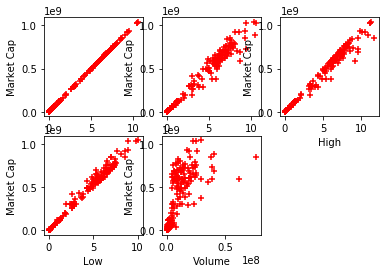

In [25]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='red')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(new_df.Open, new_df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(new_df.Close, new_df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(new_df.High, new_df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(new_df.Low, new_df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(new_df.Volume, new_df['Market Cap'],'Volume')

In [26]:
from sklearn import linear_model

model    = linear_model.LinearRegression()
x        = new_df[['Open']]
y        = new_df['Market Cap']

In [27]:
# train data using linear regression 
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# Model Score
model.score(x, y)

0.9999993479730721

In [29]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
x = df1[['Open']]
y = model.predict(x) 
df1['Market Cap Predict'] = y.astype('int64')
df1[df1['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
Date,,,,,,,
2016-08-12,0.013826,0.013897,0.009226,0.011175,48504,NaN,1338501


#### 4. Data Visualization

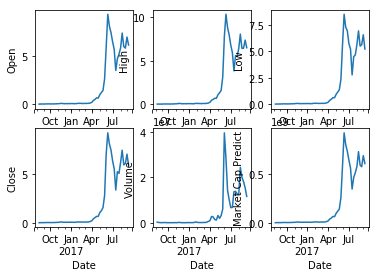

In [31]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1['Volume'].resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df1['Market Cap Predict'].resample('W').mean().plot()